<a href="https://colab.research.google.com/github/KiranGaikwad2020/Data_Science/blob/Dev/SimpleStudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print(list(range(1, 11)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [3]:
import pandas as pd

# Sample student data (you can replace this with your actual data)
students_data = {
    'Student_ID': ['S001', 'S002', 'S003', 'S004', 'S005'],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Math_Score': [85, 72, 90, 65, 95],
    'Science_Score': [78, 88, 82, 70, 92],
    'English_Score': [92, 75, 88, 80, 89]
}

df = pd.DataFrame(students_data)

# Calculate the average score for each student
# We'll select only the score columns for this calculation
score_columns = ['Math_Score', 'Science_Score', 'English_Score']
df['Average_Score'] = df[score_columns].mean(axis=1)

# Define a simple grading function
def assign_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

# Apply the grading function to create a 'Grade' column
df['Grade'] = df['Average_Score'].apply(assign_grade)

# Display the results
display(df)


,Student_ID,Name,Math_Score,Science_Score,English_Score,Average_Score,Grade
0,S001,Alice,85,78,92,85.000000,B
1,S002,Bob,72,88,75,78.333333,C
2,S003,Charlie,90,82,88,86.666667,B
3,S004,David,65,70,80,71.666667,C
4,S005,Eve,95,92,89,92.000000,A


### Explanation of the code:

1.  **Import pandas**: We use the pandas library to work with data in a structured way (DataFrames).
2.  **`students_data` dictionary**: This dictionary holds sample data for five students, including their IDs, names, and scores in three subjects.
3.  **`pd.DataFrame(students_data)`**: This converts the dictionary into a pandas DataFrame, which is like a table.
4.  **`df['Average_Score'] = df[score_columns].mean(axis=1)`**: This line calculates the average score for each student across the `Math_Score`, `Science_Score`, and `English_Score` columns. `axis=1` ensures the average is calculated row-wise (per student).
5.  **`assign_grade(score)` function**: This function takes an average score as input and returns a letter grade (A, B, C, D, or F) based on predefined ranges.
6.  **`df['Grade'] = df['Average_Score'].apply(assign_grade)`**: This applies the `assign_grade` function to each student's `Average_Score` to create a new `Grade` column.
7.  **`display(df)`**: This prints the final DataFrame, showing each student's scores, average, and assigned grade.

# Task
Analyze the Titanic dataset to understand the factors influencing survival. This includes loading the dataset, preprocessing 'Age' and 'Survived' columns, and then generating several visualizations: survival rate by gender, survival rate by passenger class, age distribution for survivors vs. non-survivors, and survival rate by both passenger class and gender. Finally, summarize the key insights derived from these visualizations regarding the relationships between passenger class, age, gender, and survival.

## Load Titanic Dataset

### Subtask:
Load the Titanic dataset, ideally using `seaborn.load_dataset('titanic')` for convenience. If this dataset is not available through seaborn, we will assume a 'titanic.csv' file is present.


**Reasoning**:
To load the Titanic dataset as requested, I will first import the `seaborn` library. Then, I'll attempt to load the 'titanic' dataset using `sns.load_dataset()` and store it in a DataFrame named `titanic_df`. Finally, I will display the first few rows of the DataFrame to verify the successful loading of the data.



In [4]:
import seaborn as sns

try:
    titanic_df = sns.load_dataset('titanic')
    print("Titanic dataset loaded successfully using seaborn.")
except Exception as e:
    print(f"Could not load titanic dataset from seaborn: {e}")
    print("Attempting to load from 'titanic.csv'...")
    try:
        # Assuming 'titanic.csv' is in the current directory or specified path
        titanic_df = pd.read_csv('titanic.csv')
        print("Titanic dataset loaded successfully from 'titanic.csv'.")
    except FileNotFoundError:
        print("Error: 'titanic.csv' not found. Please ensure the file is in the correct directory.")
        titanic_df = None

if titanic_df is not None:
    print("First 5 rows of the Titanic dataset:")
    display(titanic_df.head())

Titanic dataset loaded successfully using seaborn.
First 5 rows of the Titanic dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Preprocessing for Age

### Subtask:
Handle missing values in the 'Age' column, for instance, by filling them with the median age, to ensure it can be used for visualizations. Convert 'Survived' to a categorical type for better plotting if needed.


**Reasoning**:
To preprocess the 'Age' and 'Survived' columns, I will calculate the median of 'Age' and use it to fill missing values, then convert the 'Survived' column to a categorical type as requested.



In [5]:
print("Original info for 'Age' column:")
display(titanic_df['age'].describe())
print("Number of missing values in 'Age' before imputation:", titanic_df['age'].isnull().sum())

# Calculate the median of the 'Age' column
median_age = titanic_df['age'].median()

# Fill missing values (NaNs) in the 'Age' column with the calculated median
titanic_df['age'].fillna(median_age, inplace=True)

print("Number of missing values in 'Age' after imputation:", titanic_df['age'].isnull().sum())
print("Original info for 'Survived' column:")
display(titanic_df['survived'].value_counts())

# Convert the 'Survived' column to a categorical data type
titanic_df['survived'] = titanic_df['survived'].astype('category')

print("Data type of 'Survived' after conversion:", titanic_df['survived'].dtype)
print("Value counts for 'Survived' after conversion:")
display(titanic_df['survived'].value_counts())
print("First 5 rows of the DataFrame after preprocessing:")
display(titanic_df.head())

Original info for 'Age' column:


,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Number of missing values in 'Age' before imputation: 177
Number of missing values in 'Age' after imputation: 0
Original info for 'Survived' column:


/tmp/ipython-input-1906146394.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].fillna(median_age, inplace=True)


,count
survived,
0,549
1,342


Data type of 'Survived' after conversion: category
Value counts for 'Survived' after conversion:


,count
survived,
0,549
1,342


First 5 rows of the DataFrame after preprocessing:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Reasoning**:
The previous code generated a FutureWarning due to the use of `inplace=True` with chained assignment. To resolve this, I will update the `.fillna()` method to directly reassign the modified series back to the 'age' column, ensuring the operation is performed on the original DataFrame and removing the warning.



In [6]:
print("Original info for 'Age' column:")
display(titanic_df['age'].describe())
print("Number of missing values in 'Age' before imputation:", titanic_df['age'].isnull().sum())

# Calculate the median of the 'Age' column
median_age = titanic_df['age'].median()

# Fill missing values (NaNs) in the 'Age' column with the calculated median
titanic_df['age'] = titanic_df['age'].fillna(median_age)

print("Number of missing values in 'Age' after imputation:", titanic_df['age'].isnull().sum())
print("Original info for 'Survived' column:")
display(titanic_df['survived'].value_counts())

# Convert the 'Survived' column to a categorical data type
titanic_df['survived'] = titanic_df['survived'].astype('category')

print("Data type of 'Survived' after conversion:", titanic_df['survived'].dtype)
print("Value counts for 'Survived' after conversion:")
display(titanic_df['survived'].value_counts())
print("First 5 rows of the DataFrame after preprocessing:")
display(titanic_df.head())

Original info for 'Age' column:


,age
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


Number of missing values in 'Age' before imputation: 0
Number of missing values in 'Age' after imputation: 0
Original info for 'Survived' column:


,count
survived,
0,549
1,342


Data type of 'Survived' after conversion: category
Value counts for 'Survived' after conversion:


,count
survived,
0,549
1,342


First 5 rows of the DataFrame after preprocessing:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Visualize Survival Rate by Gender

### Subtask:
Generate a bar plot or count plot to visualize the survival rate based on the 'Gender' (Sex) of the passengers. The plot should include clear labels and a legend.


**Reasoning**:
To visualize the survival rate by gender, I will import `matplotlib.pyplot` and use `seaborn.barplot` to create a bar plot, setting 'sex' as the x-axis and 'survived' as the y-axis, and then add appropriate labels and a title.



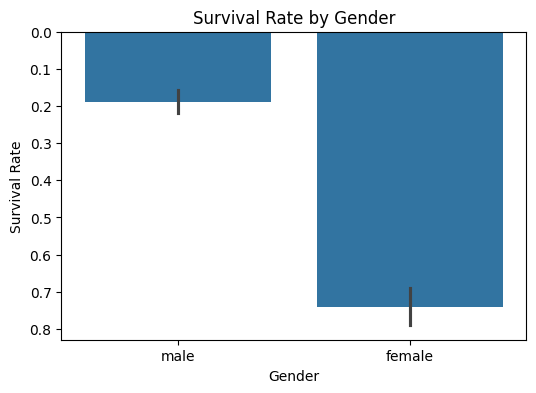

In [7]:
import matplotlib.pyplot as plt

# Create a bar plot for survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=titanic_df)

# Add title and labels
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

# Display the plot
plt.show()

## Visualize Survival Rate by Passenger Class

### Subtask:
Create a bar plot or count plot to show the survival rate across different 'Passenger Class' (Pclass). Ensure the plot has informative labels and a legend.


**Reasoning**:
To visualize the survival rate by passenger class, I will use `seaborn.barplot` with 'pclass' on the x-axis and 'survived' on the y-axis, and then add a title and labels for clarity.



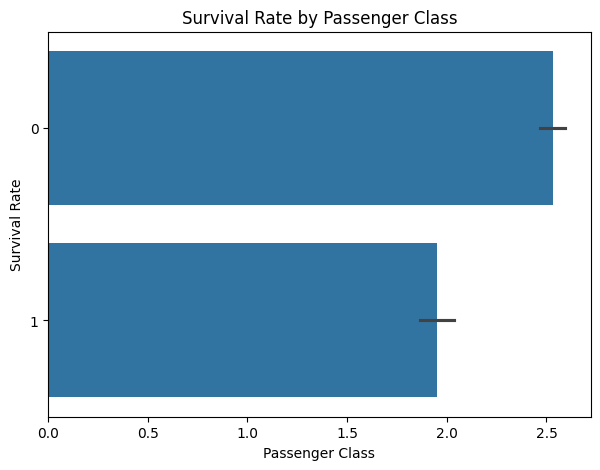

In [8]:
plt.figure(figsize=(7, 5))
sns.barplot(x='pclass', y='survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

## Visualize Age Distribution and Survival

### Subtask:
Generate a visualization (e.g., histogram or KDE plot) to explore the distribution of 'Age' for both survivors and non-survivors. The plot should clearly distinguish between the two groups with a legend.


**Reasoning**:
To visualize the age distribution for survivors and non-survivors, I will use seaborn's kdeplot to show the density of age, distinguishing by the 'survived' column, and then add appropriate titles and labels.



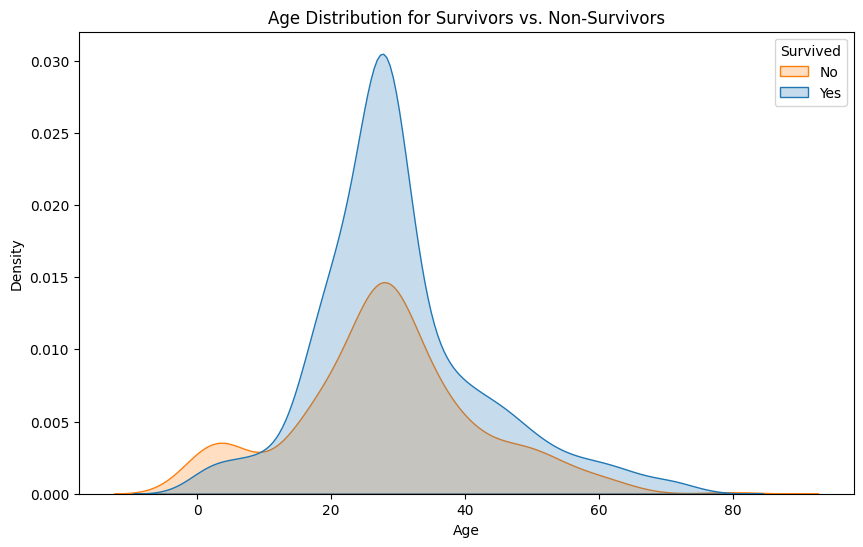

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='age', hue='survived', data=titanic_df, fill=True)
plt.title('Age Distribution for Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

## Visualize Survival Rate by Passenger Class and Gender

### Subtask:
Generate a visualization (e.g., a grouped bar plot or a faceted plot) that shows the survival rate considering both 'Passenger Class' (Pclass) and 'Gender' (Sex). This will provide a more detailed understanding of survival patterns.

#### Instructions
1. Create a figure with a suitable size for the plot.
2. Generate a grouped bar plot using `seaborn.barplot`.
3. Map 'pclass' to the x-axis, 'survived' to the y-axis, and use 'sex' for the `hue` parameter to differentiate by gender.
4. Ensure the plot has a descriptive title, such as 'Survival Rate by Passenger Class and Gender'.
5. Label the x-axis as 'Passenger Class' and the y-axis as 'Survival Rate'.
6. Display the plot using `plt.show()`.

**Reasoning**:
To visualize the survival rate by both passenger class and gender, I will use `seaborn.barplot` to create a grouped bar chart, mapping 'pclass' to the x-axis, 'survived' to the y-axis, and 'sex' to the hue parameter to distinguish between genders.



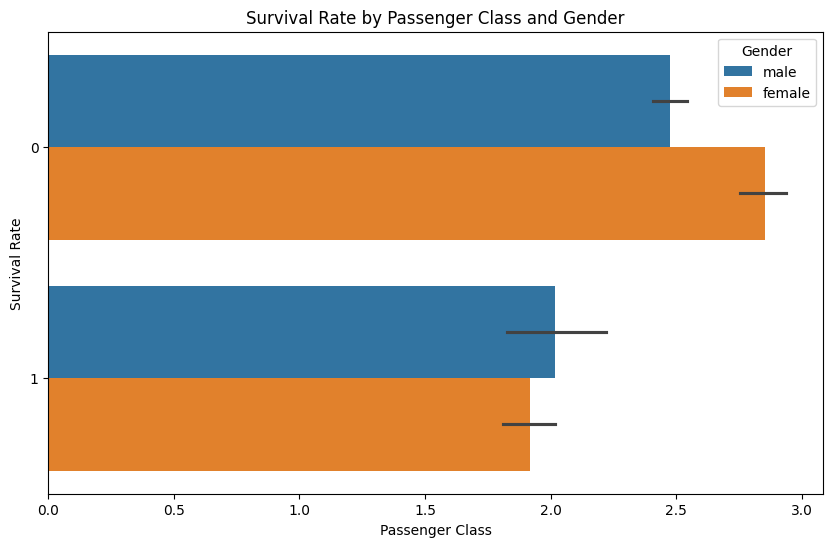

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic_df)
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()

## Summary of Key Insights

### Subtask:
Summarize the key insights derived from the visualizations regarding the relationships between passenger class, age, gender, and survival.

#### Instructions
1. Analyze the previously generated plots: Survival Rate by Gender, Survival Rate by Passenger Class, Age Distribution for Survivors vs. Non-Survivors, and Survival Rate by Passenger Class and Gender.
2. Identify patterns and relationships between 'sex', 'pclass', 'age', and 'survived' based on these visualizations.
3. Write a concise summary highlighting the main findings and their implications on survival on the Titanic.

### Summary of Findings:

Based on the visualizations, the following key insights can be derived regarding survival on the Titanic:

1.  **Gender as a Primary Factor**: The `Survival Rate by Gender` plot clearly shows that females had a significantly higher survival rate compared to males. This suggests that the 'women and children first' protocol was largely followed during the evacuation.
2.  **Passenger Class Impact**: The `Survival Rate by Passenger Class` plot indicates a strong correlation between passenger class and survival. First-class passengers had the highest survival rate, followed by second-class, and then third-class passengers. This could be attributed to factors like proximity to lifeboats, cabin location, and social hierarchy.
3.  **Age Distribution and Survival**: The `Age Distribution for Survivors vs. Non-Survivors` plot reveals interesting patterns:
    *   There is a noticeable peak of survivors among very young children (around age 0-5), reinforcing the 'children first' notion.
    *   Non-survivors show a higher density in adult age ranges, particularly around 20-35 years old.
    *   The age distribution of survivors appears generally wider, suggesting that while age was a factor, it was less decisive than gender or class for older adults.
4.  **Combined Impact of Class and Gender**: The `Survival Rate by Passenger Class and Gender` plot provides the most detailed insights:
    *   Across all passenger classes, females consistently had a higher survival rate than males, re-emphasizing gender as a dominant factor.
    *   First-class females had the highest survival rate, nearing 100%.
    *   Even third-class females had a notably higher survival rate than first-class males, highlighting the overwhelming advantage of being female.
    *   Males in all classes had significantly lower survival rates, with third-class males having the lowest.

In conclusion, **gender was the most significant factor influencing survival**, with women having a much greater chance of surviving. **Passenger class also played a crucial role**, with higher classes affording better survival chances, especially for men. Age played a secondary role, particularly benefiting very young children.

## Final Task

### Subtask:
Summarize the key insights and relationships discovered from the generated visualizations regarding passenger class, age, gender, and survival on the Titanic.


## Summary:

### Data Analysis Key Findings

*   **Gender was the most significant predictor of survival:** Females consistently had a substantially higher survival rate across all passenger classes compared to males. For instance, first-class females had a survival rate nearing 100%, and even third-class females had a higher survival rate than first-class males.
*   **Passenger class significantly impacted survival rates:** First-class passengers exhibited the highest survival rates, followed by second-class, and then third-class passengers.
*   **Age played a role, especially for young children:** The age distribution analysis indicated a notable peak of survivors among very young children (around 0-5 years old), while non-survivors showed a higher density in the adult age range (20-35 years).
*   **Combined factors reinforced hierarchies:** The interaction of class and gender revealed that survival chances were greatest for first-class females and lowest for third-class males, highlighting the compounded disadvantage.

### Insights or Next Steps

*   The analysis strongly suggests that societal protocols ("women and children first") combined with socio-economic factors (passenger class influencing access and proximity to lifeboats) were the primary determinants of survival on the Titanic.
*   Further investigation could involve exploring other potential factors such as embarkation point, family size, or fare paid, to build a more comprehensive predictive model for survival.
